# PYGAM

<a id="toc"></a>
## Contents

* [GAM](#gam)
* [LogisticGAM](#logisticgam)
* [Time series with GAM](#timeseries)
* [Marketing Example](#marketing)


<a id="gam"></a>
## GAM - Generalized Additive Models

[Table of contents](#toc)


GAMs are smooth, semi-parametric models of the form:

\begin{equation*}
y = \sum_{i=0}^{n-1} \beta_i f_i\left(x_i\right)
\end{equation*}

where $y$ is the dependent variable, $x_i$ are the independent variables, $\beta$ are the model coefficients, and $f_i$ are the feature functions. We build the $f_i$ using a type of function called a spline; splines allow us to automatically model non-linear relationships without having to manually try out many different transformations on each variable.

Difference between GLM and GAM:
- GAM can handle non-linear, linear and non-monotonic relationships between response and predictor variables.
- GLM is a generalization of linear regression to allow for modelling of response variables that have non-normal error distribution. 


In [1]:
import pandas as pd   
import numpy as np
from pygam import LogisticGAM, LinearGAM
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from funcs import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
hideCode()

<a id="logisticgam"></a>
## Logistic GAM

[Table of contents](#toc)

Source to the below example: https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f

In [4]:
# help(LogisticGAM)

In [5]:
# help(load_breast_cancer)

In [6]:
data = load_breast_cancer()
# data.feature_names

In [7]:
#keep first 6 features only
df = pd.DataFrame(data.data, columns=data.feature_names)[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
target_df = pd.Series(data.target)
print ("Summary statistics of breast cancer dataset")
print ("===========================================\n")
print (df.describe())

Summary statistics of breast cancer dataset

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  
count       569.000000        569.000000  
mean          0.096360          0.104341  
std           0.014064          0.052813  
min           0.052630          0.019380  
25%           0.086370          0.064920  
50%           0.095870          0.092630  
75%           0.105300          0.130400  
max           0.163400   

In [8]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
y = target_df
#Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)

In [9]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.4476
Link Function:                        LogitLink Log Likelihood:                                   -54.0256
Number of Samples:                          569 AIC:                                              146.9464
                                                AICc:                                             148.5483
                                                UBRE:                                               2.2856
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8562
Feature Function                  Lam

In [10]:
print ("Accuracy: {} ".format(gam.accuracy(X, y)))

Accuracy: 0.9560632688927944 


**Partial dependence plots-** The partial dependence plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features.

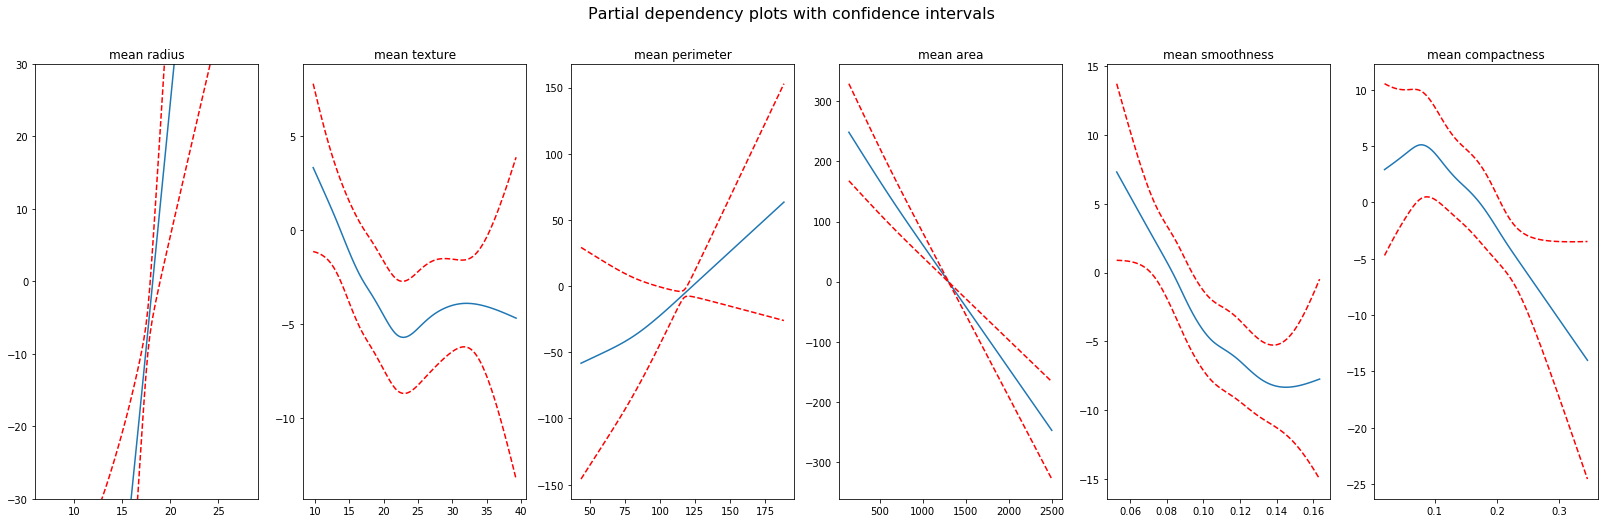

In [11]:
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
titles = data.feature_names
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    confi = np.asarray(confi)
    confi = confi.squeeze()
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);
fig.suptitle("Partial dependency plots with confidence intervals", size=16)
plt.show();

The default parameters used for the above model are:
- n_splines = 20
- lambda = 0.6

In [12]:
lambda_ = 0.6
n_splines = [25, 6, 25, 25, 6, 4] # number of splines to use in each of the smooth function that is going to be fitted.
constraints = None
gam = LogisticGAM(constraints=constraints, 
          lam=lambda_,
         n_splines=n_splines).fit(X, y)

In [13]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     11.0758
Link Function:                        LogitLink Log Likelihood:                                   -65.0026
Number of Samples:                          569 AIC:                                              152.1568
                                                AICc:                                             152.7248
                                                UBRE:                                                2.283
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.827
Feature Function                  Lam

In [14]:
print ("Accuracy: {} ".format(gam.accuracy(X, y)))

Accuracy: 0.9507908611599297 


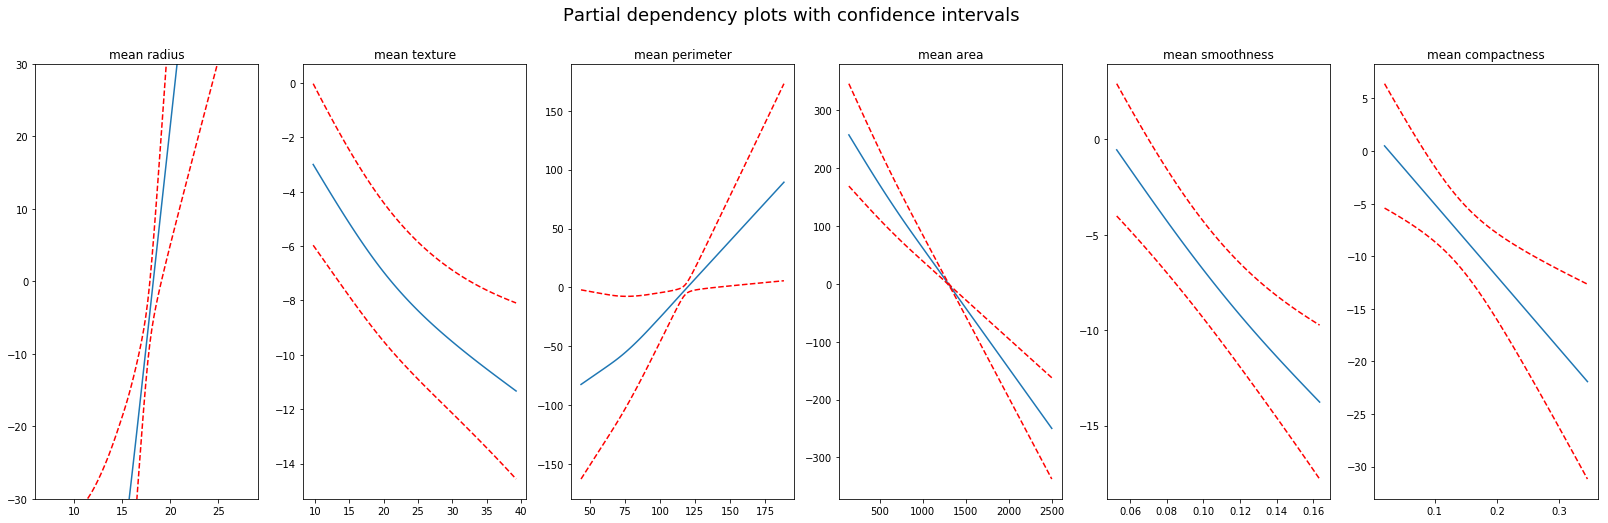

In [15]:
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
titles = data.feature_names
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    confi = np.asarray(confi)
    confi = confi.squeeze()
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

fig.suptitle("Partial dependency plots with confidence intervals", size=18);


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gam = LogisticGAM(n_splines = 10).gridsearch(X_train.values, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


### Predict classes or probability

**Accuracy and log loss with default parameters**

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

Accuracy: 0.9574468085106383 
Log Loss: 0.1356365781561188 


**Generalizing the model by reducing the number of splines**

In [18]:
lambda_ = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
n_splines = [4, 14, 4, 6, 12, 12] 
constraints = [None, None, None, None, None, None]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gam = LogisticGAM(constraints=constraints, 
                  lam=lambda_,
                 n_splines=n_splines).gridsearch(X_train.values, y_train)
predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Accuracy: 0.9680851063829787 
Log Loss: 0.10721544286632105 


<a id="timeseries"></a>
## Time Series with GAM

[Table of contents](#toc)

**LinearGAM - Source: https://tomkealy.github.io/**

**Time series of electricity consumption from https://github.com/PetoLau/petolau.github.io/tree/master/_rmd**

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

def load_data(file):
    df = pd.read_csv(file, usecols=(range(1,6)))

    weekday_map = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
    df['weekday'] = df['week'].map(weekday_map)

    n_type = pd.unique(df['type'])
    begin = "2012-02-27"
    end = "2012-03-12"
    mask = (df['date_time'] > begin) & (df['date_time'] <= end)
    data = df.loc[mask]

    data = data[df['type'] == n_type[0]]
    return data

data = load_data('C:\\Users\\SheshadriA\\Desktop\\GAM\\marketing-dataset-r\\DT_4_ind.csv')


In [20]:
print ("First 5 records of electricity consumption data")
print ("===============================================")
print (data.head())

First 5 records of electricity consumption data
                date_time      value    week        date                 type  \
2688  2012-02-27 00:00:00  1630.8752  Monday  2012-02-27  Commercial Property   
2689  2012-02-27 00:30:00  1611.2010  Monday  2012-02-27  Commercial Property   
2690  2012-02-27 01:00:00  1657.1605  Monday  2012-02-27  Commercial Property   
2691  2012-02-27 01:30:00  1653.0418  Monday  2012-02-27  Commercial Property   
2692  2012-02-27 02:00:00  1702.3163  Monday  2012-02-27  Commercial Property   

      weekday  
2688        1  
2689        1  
2690        1  
2691        1  
2692        1  


In [21]:
data.date_time = pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S.%f')
data.set_index(['date_time'],inplace=True)

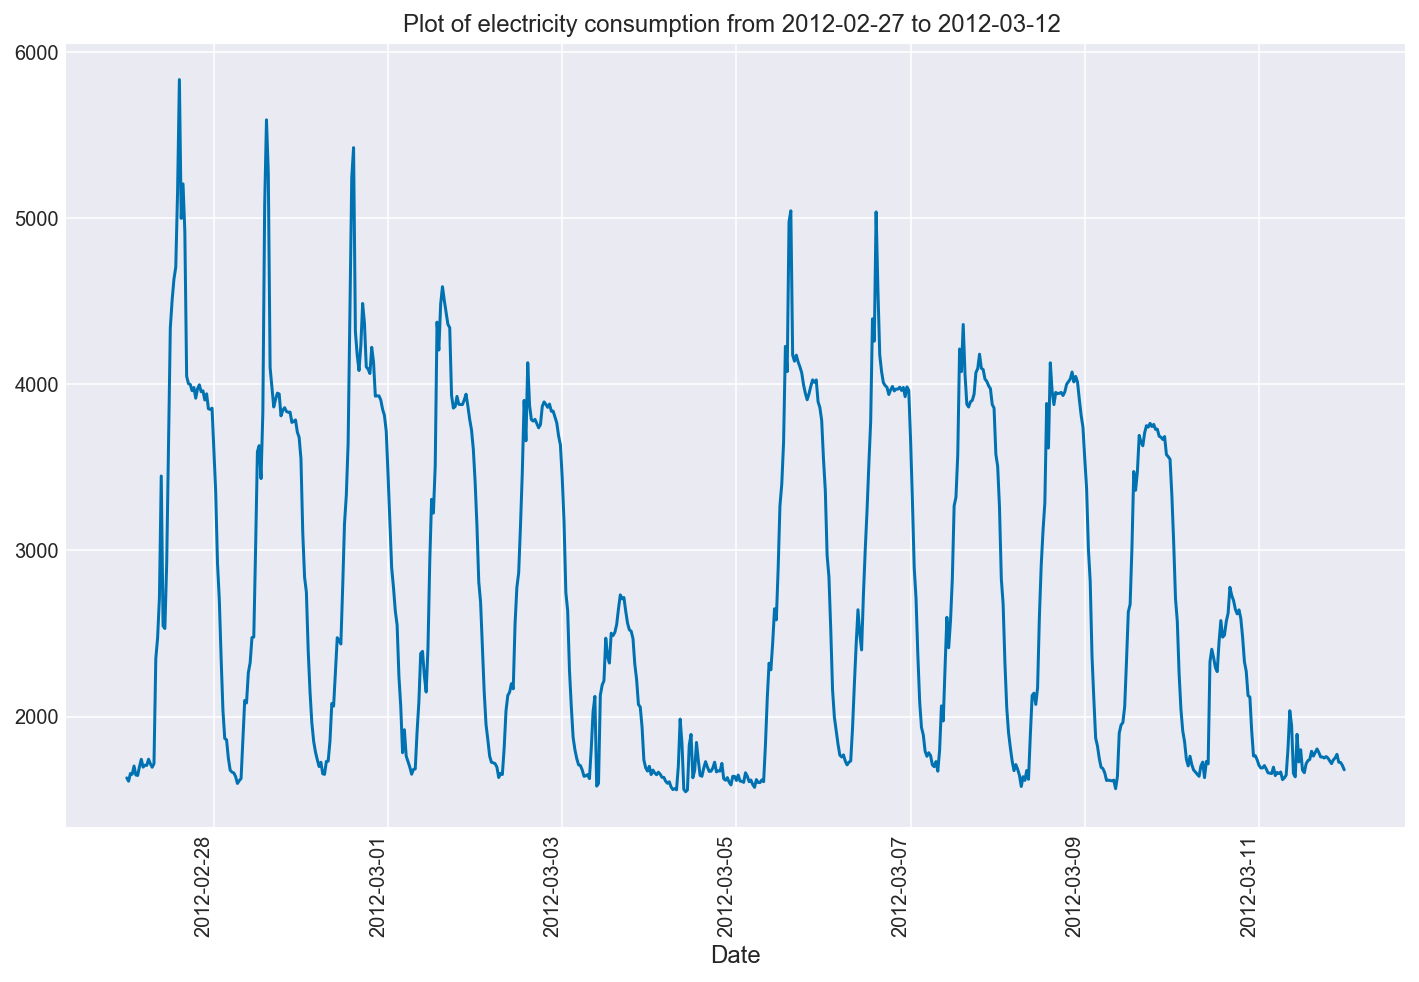

In [22]:
# data.index = pd.to_datetime(data.date)
# data.plot(x = 'date_time', y= 'value')
# plt.show()
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize=(12, 8))
fig.autofmt_xdate(rotation=90)
ax.plot(data.index, data.value)
ax.set_xlabel('Date', fontsize=12)
plt.title('Plot of electricity consumption from 2012-02-27 to 2012-03-12 ')
plt.show()

In [23]:
# data.shape

In [24]:
period = 48
N = data.shape[0] # number of observations in the train set
window = N / period # number of days in the train set

weekly = data['weekday']
x = np.array(range(1, period+1))
daily = np.tile(x, int(window))

matrix_gam = pd.DataFrame(columns=['daily', 'weekly', 'load'])
matrix_gam['load'] = data['value']
matrix_gam['daily'] = daily
matrix_gam['weekly'] = weekly

In [25]:
X_train, X_test, y_train, y_test = train_test_split(matrix_gam[['daily', 'weekly']], matrix_gam['load'], test_size=0.33, random_state=42)

In [26]:
gam = LinearGAM(n_splines=10).gridsearch(X_train.values, y_train)
#XX = gam.generate_X_grid(term=1)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


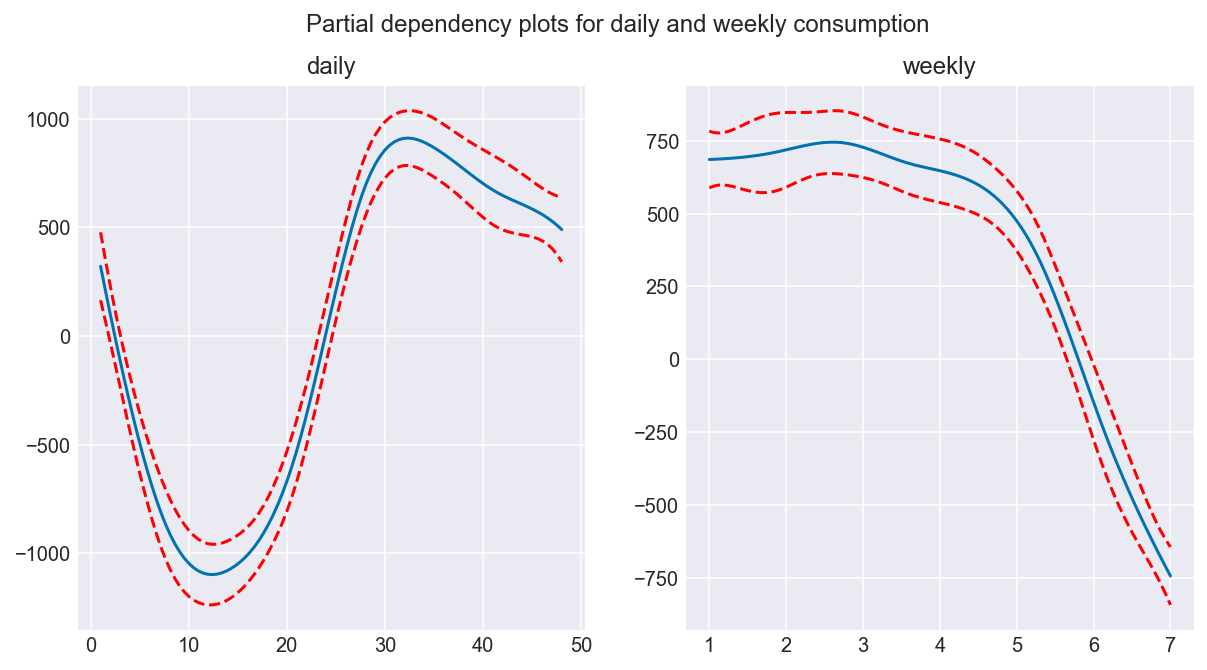

In [27]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
titles = ['daily', 'weekly']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    confi = np.asarray(confi)
    confi = confi.squeeze()
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    
fig.suptitle("Partial dependency plots for daily and weekly consumption", size=12);

We can see that the electricity load follows an approximate sin pattern during the day, and that the electricity load falls off during the week! If we'd tried using a linear model to do this, we'd have had to build these features manually - the good thing about GAMs is that they do this for us. 

Let's visualise the fit.

In [28]:
predictions = gam.predict(matrix_gam[['daily', 'weekly']])
# predictions.shape

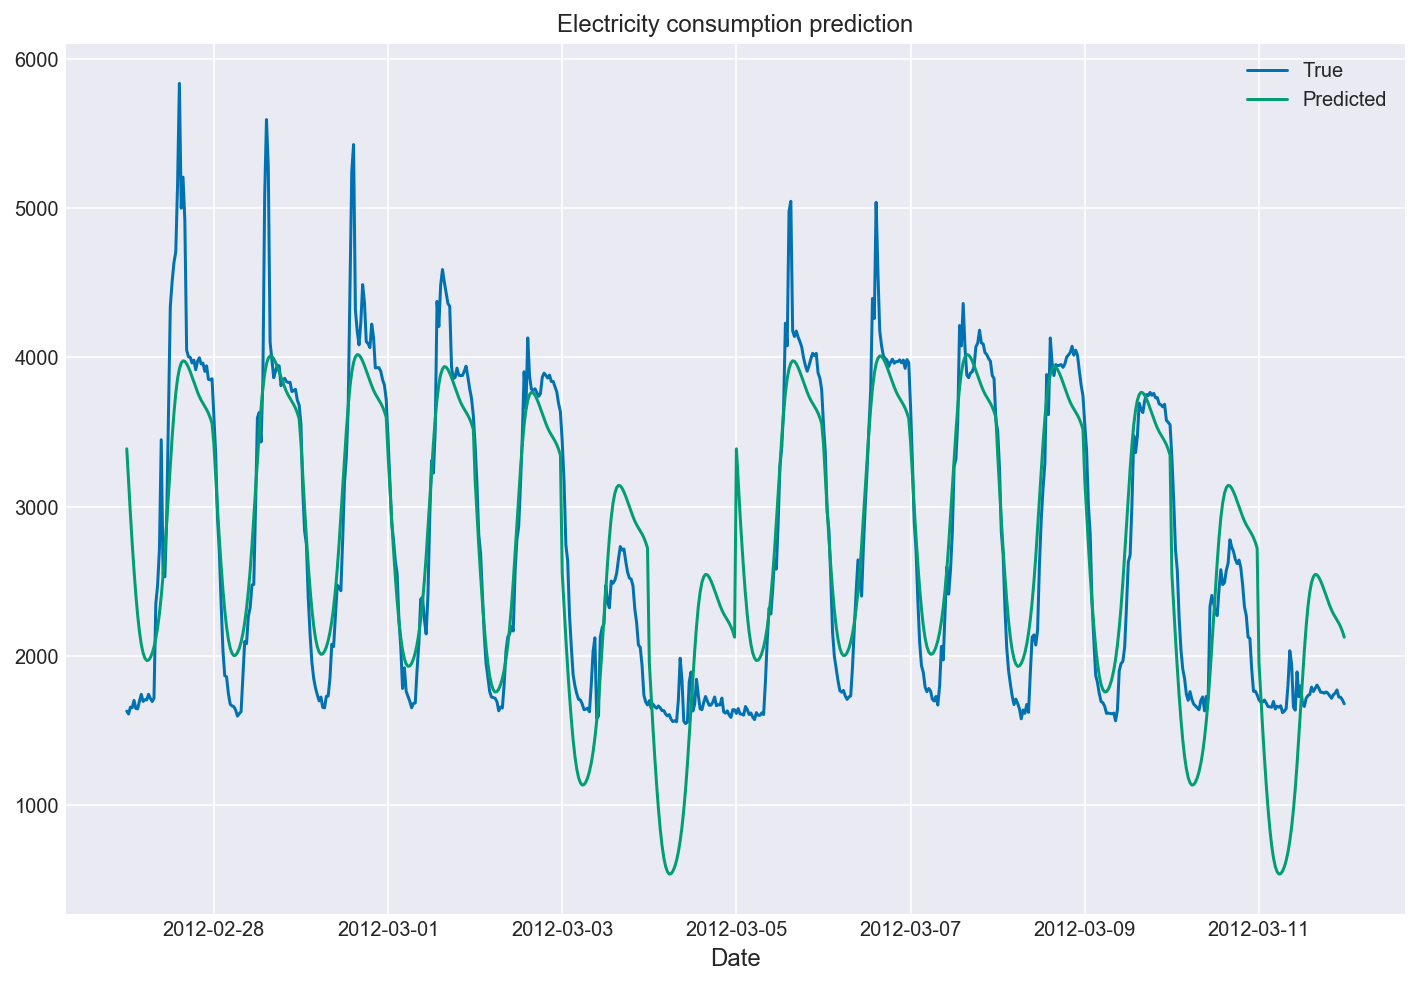

In [29]:
fig = plt.figure(figsize=(12, 8))
plt.plot(data.index, matrix_gam['load'])
plt.plot(data.index, predictions)
# plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize = 12)
plt.title('Electricity consumption prediction')
plt.legend(['True', 'Predicted']);

<a id="marketing"></a>
## Marketing Example

[Table of contents](#toc)


Data source : https://multithreaded.stitchfix.com/blog/2015/07/30/gam/

We will be using a marketing example from the insurance industry (source undisclosed). The data contains information on customer responses to a historical direct mail marketing campaign. 
Our goal is to improve the performance of future waves of this campaign by targeting people who are likely to take the offer. We will do this by building a “look-alike” model to predict the probability that a given client will accept 
the offer, and then use that model to select the target audience going forward.

**Data**

The dataset has 68 predictive variables and 20k records. For modeling and validation purposes, we split the data into 2 parts:

- 10k records for training. This dataset will be used to estimate models.
- 10k records for testing. This dataset will be kept in a vault to the very end and used to compare models.

The success of the model will be based on its ability to predict the probability that the customer takes the offer (captured by the PURCHASE indicator), for the validation dataset.

Most variables contain credit information, such as number of accounts, active account types, credit limits, and utilization. The dataset also captures the age and location of the individuals.

In [30]:
train = pd.read_csv('train.csv', usecols=range(1,70)) #Training set
valid = pd.read_csv('valid.csv', usecols=range(1,70)) #Validation set

In [31]:
# train.head()

In [32]:
# valid.head()

In [33]:
df_train = train.drop('PURCHASE',axis=1)
df_valid = valid.drop('PURCHASE',axis=1)
# df_train.head()

### Variable selection
**Weight Of Evidence(WOE) and Information Value(IV)**

Weight of evidence (WOE) is a measure of how much the evidence supports or undermines a hypothesis.The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.

**WOE = $log(\frac{Event \%}{Non Event \%}) $**

Information value is a technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.

**IV = $ {\sum(Event \% - Non Event \%)} * log(\frac{Event \%}{Non Event \%})$ **

In [34]:
from funcs import *
final_iv, IV = data_vars(df_train,train.PURCHASE)

In [35]:
print ("First 5 records of all WOE transformations with IV values")
print ("=========================================================\n")
print (final_iv.head())

First 5 records of all WOE transformations with IV values

                 VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0  M_SNC_MST_RCNT_ACT_OPN        0.0       17.0   5089   1355    0.266261   
1  M_SNC_MST_RCNT_ACT_OPN       18.0      564.0   4911    668    0.136021   
2    TOT_HI_CRDT_CRDT_LMT        0.0     2542.0   3334    135    0.040492   
3    TOT_HI_CRDT_CRDT_LMT     2545.0    65215.0   3333    877    0.263126   
4    TOT_HI_CRDT_CRDT_LMT    65222.0  5075437.0   3333   1011    0.303330   

   NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0      3734        0.733739    0.669797        0.468096  0.358302  0.168433  
1      4243        0.863979    0.330203        0.531904 -0.476757  0.168433  
2      3199        0.959508    0.066733        0.401028 -1.793338  0.755277  
3      2456        0.736874    0.433515        0.307885  0.342199  0.755277  
4      2322        0.696670    0.499753        0.291087  0.540492  0.755277  


**IV statistic can be interpreted as follows.**

If the IV statistic is:
* Less than 0.02, then the predictor is not useful for modeling 
* 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
* 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
* 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
* 0.5, suspicious relationship

In [36]:
IV_sorted = IV.sort_values('IV', ascending=False) #Sort IV in descending order
# IV_sorted.head()

In [37]:
data = [go.Bar(x=IV_sorted['VAR_NAME'], y=IV_sorted['IV'], text=IV_sorted['VAR_NAME'],
            marker=dict(color='rgb(58,256,225)',line=dict(color='rgb(8,48,107)',width=1.5, ) ),
    opacity=0.6)]


layout = go.Layout(
    title='Information Values',
        xaxis=dict(
        tickangle=-45,
        title='Features',
        tickfont=dict(
            size=10,
            color='rgb(7, 7, 7)'
        )
    ),
    yaxis=dict(
        title='Information Value(IV)',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)
plotly.offline.iplot({ "data": data,'layout':layout})


In [38]:
# pd.options.display.float_format = '{:,.4f}'.format

Consider variables with IV(Information Value) greater than 0.05 and less than 0.5

In [39]:
IV_imp = list(IV_sorted[(IV_sorted.IV > 0.1) & (IV_sorted.IV < 0.5)]['VAR_NAME'])
# len(IV_imp)
# print ("Useful variables: ", IV_imp)

In [40]:
#Removing the weaker variables
df_train = df_train[IV_imp]
df_train['TARGET'] = train.PURCHASE
df_valid = df_valid[IV_imp]
df_valid['TARGET'] = valid.PURCHASE


In [41]:
# len(train)

In [42]:
# len(df_train)

In [43]:
# df_train.head()

#### Finding correlation

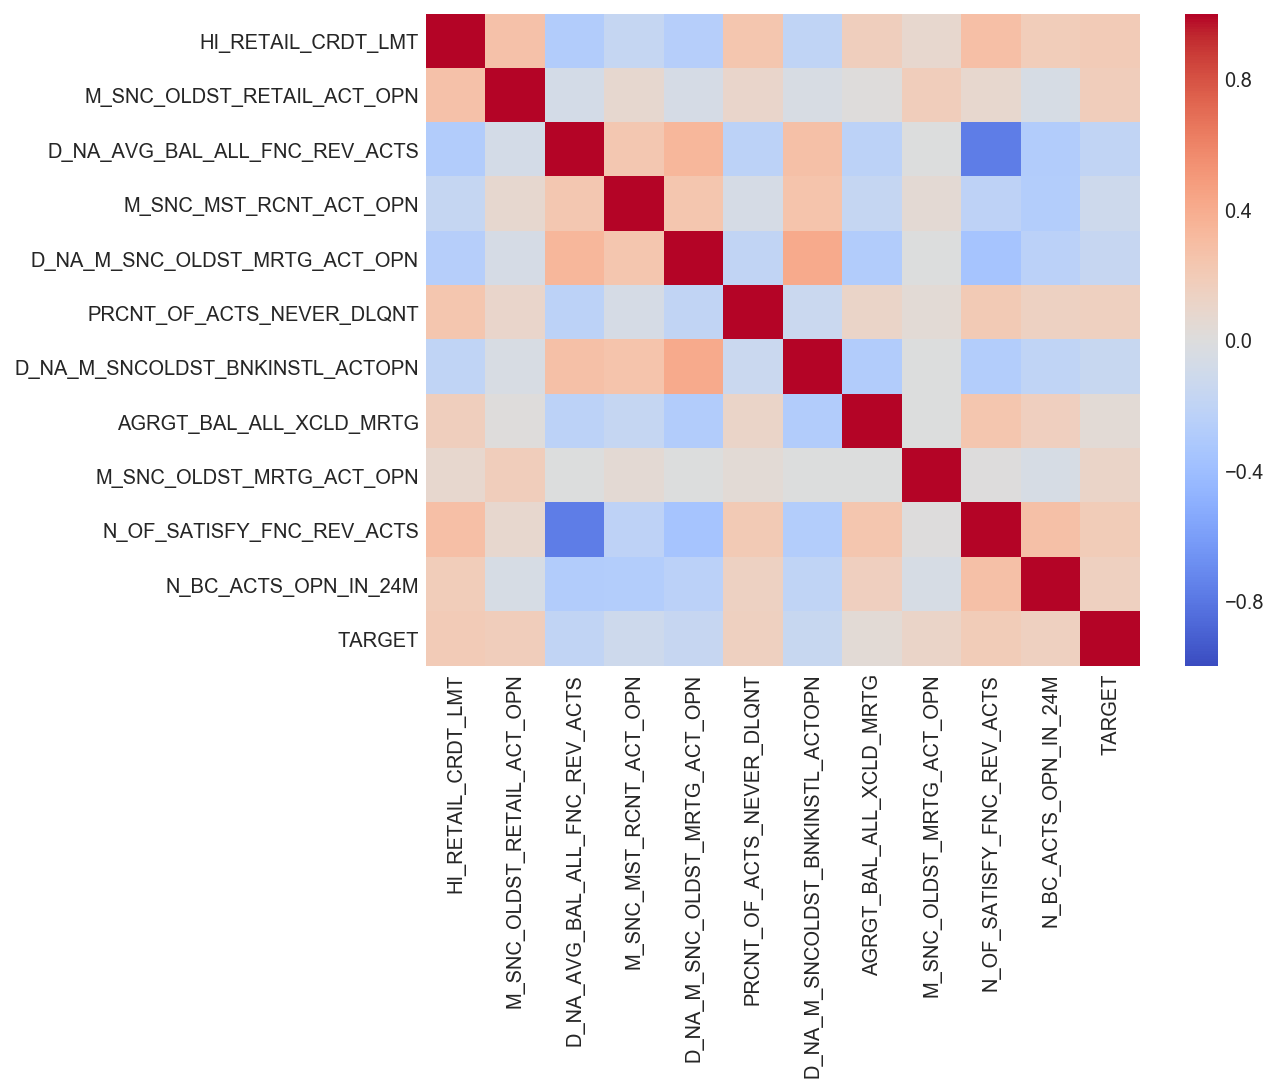

In [44]:
import seaborn as sns
fig, ax=plt.subplots(1,1,figsize=(8,6))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, cmap='coolwarm', ax=ax);
plt.show()


In [45]:
# Create correlation matrix
corr_matrix = df_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#print (upper)
# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.4)]

print ("Correalted columns to drop:", to_drop)

Correalted columns to drop: ['D_NA_M_SNCOLDST_BNKINSTL_ACTOPN', 'N_OF_SATISFY_FNC_REV_ACTS']


In [46]:
# df.corr()['TARGET'].sort_values(ascending = False)

In [47]:
# Drop highly correlated variables
df_train = df_train.drop(df_train[to_drop], axis=1)
df_valid = df_valid.drop(df_valid[to_drop], axis=1)


In [48]:
print ("Training data")
print ("=============\n")
print(df_train.head())
print ("\nValidation data")
print ("===============\n")
print(df_valid.head())


Training data

   HI_RETAIL_CRDT_LMT  M_SNC_OLDST_RETAIL_ACT_OPN  \
0                   0                  165.627094   
1                4300                  158.000000   
2                   0                  165.627094   
3                 600                   71.000000   
4                 200                  367.000000   

   D_NA_AVG_BAL_ALL_FNC_REV_ACTS  M_SNC_MST_RCNT_ACT_OPN  \
0                              1                    92.0   
1                              0                     2.0   
2                              1                    23.0   
3                              1                     9.0   
4                              1                   367.0   

   D_NA_M_SNC_OLDST_MRTG_ACT_OPN  PRCNT_OF_ACTS_NEVER_DLQNT  \
0                              1                      100.0   
1                              0                       97.2   
2                              1                      100.0   
3                              1                     

##### Check the distribution of observations for each class of the target

In [49]:
# Training data
res = {col:df_train[col].value_counts() for col in df_train.columns} #Unique values with count of each value for each column
print ('Training data target distribution:\n', res['TARGET'])

Training data target distribution:
 0    7977
1    2023
Name: TARGET, dtype: int64


In [50]:
#validation data
res = {col:df_valid[col].value_counts() for col in df_valid.columns} #Unique values with count of each value for each column
print ('Validation data target distribution:\n', res['TARGET'])

Validation data target distribution:
 0    8023
1    1977
Name: TARGET, dtype: int64


When to Use ROC vs. Precision-Recall Curves?

Generally, the use of ROC curves and precision-recall curves are as follows:

* ROC curves should be used when there are roughly equal numbers of observations for each class.
* Precision-Recall curves should be used when there is a moderate to large class imbalance.

Source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [51]:
trainy = df_train['TARGET']
df_train = df_train.drop(['TARGET'], axis=1)
testy = df_valid['TARGET']
df_valid = df_valid.drop(['TARGET'], axis=1)

In [52]:
# print (df_train.shape)
# print (trainy.shape)
# df_train.columns

### Model Testing

**Random Forest**

In [53]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(df_train, trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
pred = clf.predict(df_valid)
probs = clf.predict_proba(df_valid)
probs = probs[: ,1]
rf_auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % rf_auc)

AUC: 0.713


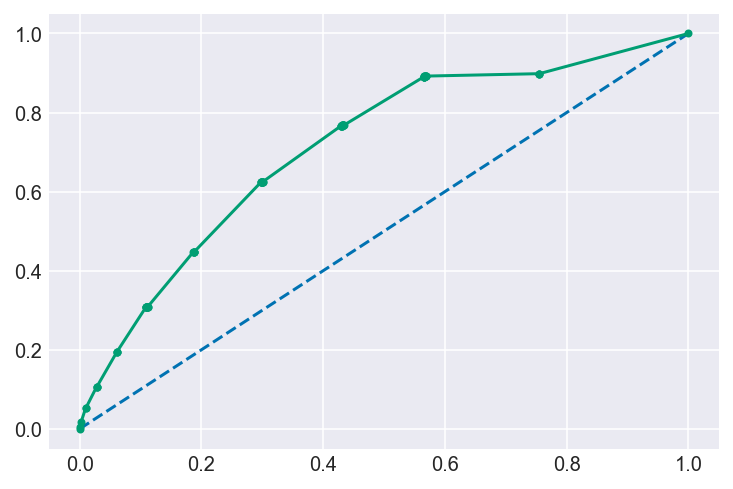

In [55]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**GAM(LogisticGAM)**

In [56]:
# lambda_ = 0.6
# # n_splines = [20, 6, 25, 6, 25, 6, 4,25, 6, 25 ] 
# n_splines = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20 ] 
# constraints = None
# gam = LogisticGAM(constraints=constraints, 
#           lam=lambda_,
#          n_splines=n_splines).fit(df_train, trainy)

gam = LogisticGAM().fit(df_train, trainy)

In [57]:
print (df_train.columns)
gam.summary()

Index(['HI_RETAIL_CRDT_LMT', 'M_SNC_OLDST_RETAIL_ACT_OPN',
       'D_NA_AVG_BAL_ALL_FNC_REV_ACTS', 'M_SNC_MST_RCNT_ACT_OPN',
       'D_NA_M_SNC_OLDST_MRTG_ACT_OPN', 'PRCNT_OF_ACTS_NEVER_DLQNT',
       'AGRGT_BAL_ALL_XCLD_MRTG', 'M_SNC_OLDST_MRTG_ACT_OPN',
       'N_BC_ACTS_OPN_IN_24M'],
      dtype='object')
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     66.2372
Link Function:                        LogitLink Log Likelihood:                                 -4347.9869
Number of Samples:                        10000 AIC:                                             8828.4481
                                                AICc:                                            8829.3721
                                                

C:\Users\SheshadriA\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




In [58]:
# plt.rcParams['figure.figsize'] = (28, 8)
# fig, axs = plt.subplots(1, len(df_train.columns[0:6]))
# titles = df_train.columns
# for i, ax in enumerate(axs):
#     XX = gam.generate_X_grid(term=i)
#     pdep, confi = gam.partial_dependence(term=i, width=.95)
#     confi = np.asarray(confi)
#     confi = confi.squeeze()
#     ax.plot(XX[:, i], pdep)
#     ax.plot(XX[:, i], confi, c='r', ls='--')
#     if i == 0:
#         ax.set_ylim(-30,30)
#     ax.set_title(titles[i]);

# fig.suptitle("Partial dependency plots with confidence intervals", size=18);

In [59]:
gam.predict_mu(df_valid)
gam_probs = gam.predict_proba(df_valid)
gam_auc = roc_auc_score(testy, gam_probs)
print('AUC: %.3f' % gam_auc)

AUC: 0.754


In [60]:
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(testy, gam_probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# # show the plot
# plt.show()

**SVM**

In [61]:
clf = SVC(kernel='rbf', probability=True)
clf.fit(df_train, trainy)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
clf.predict(df_valid)
svm_probs = clf.predict_proba(df_valid)
svm_auc = roc_auc_score(testy, svm_probs[: ,1])
print('AUC: %.3f' % svm_auc)

AUC: 0.655


In [63]:
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(testy, svm_probs[:,1])
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# # show the plot
# plt.show()

**Logistic Regression**

In [64]:
clf = LogisticRegression()
clf.fit(df_train, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
clf.predict(df_valid)
log_probs = clf.predict_proba(df_valid)
log_auc = roc_auc_score(testy, log_probs[: ,1])
print('AUC: %.3f' % log_auc)

AUC: 0.702


In [66]:
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(testy, log_probs[:,1])
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# # show the plot
# plt.show()

### Testing Results

In [67]:
data = {'Model': ['Random Forest', 'GAM', 'SVM', 'Logistic Regression'], 'Validation AUROC': [rf_auc, gam_auc, svm_auc, log_auc]}
df = pd.DataFrame(data)
print (df)

                 Model  Validation AUROC
0        Random Forest          0.713450
1                  GAM          0.753826
2                  SVM          0.654678
3  Logistic Regression          0.702331
